In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns

### 데이터 로드

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/GitHub/AI-ExpertFW-Prj/dataset')

mc_rr_df_read = pd.read_excel('modcolth_rentway_integra_data3_imputed.xlsx')

In [ ]:
mc_df_read = pd.read_excel('mc_df_cp3_imputed.xlsx')

In [ ]:
mc_df_read['category'].unique()

NameError: ignored

### 카테고리명 그룹핑

In [ ]:

['new', 'wedding', 'dresses', 'sale', 'tops', 'bottoms',
       'outerwear']

----------------------------------------------------------------------

'new',
 'wedding',
 'dresses', 	'dress'		  'shirtdress', 
 'sale', 
 'tops',    'top', 
 'bottoms',       'sweatpants',       'jeans'		 'down',
'outerwear' 
'romper'
'gown'  'ballgown', 
'sheath'	
'leggings',		legging
  'jumpsuit', 
  'sweater', 
  'jacket', 
  'maxi',
    'shift', 
	'pants',      'pant',
	'shirt',       't-shirt', 		sweatershirt     'sweatshirt',
	'mini',
	'skirt',       'skirts',
	'pullover', 
	'blouse',
       'suit',
	   'coat', 		'peacoat',   , 'overcoat',
	   'trench',
	   'bomber',
	   'cape', 
	   'blazer',
	   'vest',
       'duster', 
	   'tank',
	   'poncho',
	   'frock', 
	   'tunic',
       'cardigan', 
	   'culottes', 
	   'trouser',
	   'midi', 
	   'print', 
	   'knit',
	   'culotte', 
       'kaftan', 
	   'overalls',
	   'jogger',
	   'tee',
	   'combo', 
	   'henley', 
	   'cami',
       'blouson', 
	   'turtleneck',
	   'trousers'
	   'hoodie',
	   'caftan', 
	   'tight', 
	   'kimono',
	   'for',
	   'crewneck',
	   'parka', '
	   buttondown'
	   , 'skort'

In [ ]:
mc_rr_df_read_cp = mc_rr_df_read.copy()

In [ ]:
mc_rr_df_read_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265678 entries, 0 to 265677
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          265678 non-null  int64  
 1   size             265678 non-null  int64  
 2   rating           265678 non-null  int64  
 3   category         265678 non-null  object 
 4   user_name        74542 non-null   object 
 5   length           74518 non-null   object 
 6   fit              265678 non-null  object 
 7   user_id          265678 non-null  int64  
 8   review_summary   265678 non-null  object 
 9   review_text      265678 non-null  object 
 10  waist            74542 non-null   float64
 11  hips             74542 non-null   float64
 12  bust_size        265678 non-null  float64
 13  height           265678 non-null  float64
 14  cup_size_in_cms  265678 non-null  float64
 15  rented_for       191136 non-null  object 
 16  body_type        176687 non-null  obje

In [ ]:
mc_rr_df_read_cp['category'].value_counts().sort_values()

buttondown        1
crewneck          1
overcoat          2
sweatpants        2
caftan            4
              ...  
dresses       18268
sheath        19149
tops          19933
gown          44103
dress         92168
Name: category, Length: 75, dtype: int64

In [ ]:
len(rating_text_df['item_id'].unique())

7160

In [ ]:
mc_rr_df_read_cp.replace({'category':['dresses', 'dress', 'shirtdress']}, 'dresses', inplace = True)
mc_rr_df_read_cp.replace({'category':['tops', 'top']}, 'tops', inplace = True)
mc_rr_df_read_cp.replace({'category':['bottoms', 'sweatpants', 'jeans', 'down']}, 'bottoms', inplace = True)
mc_rr_df_read_cp.replace({'category':['leggings', 'legging']}, 'leggings', inplace = True)
mc_rr_df_read_cp.replace({'category':['shirt', 't-shirt','sweatershirt', 'sweatshirt']}, 'shirts', inplace = True)
mc_rr_df_read_cp.replace({'category':['skirt', 'skirts']}, 'skirts', inplace = True)
mc_rr_df_read_cp.replace({'category':['coat', 'peacoat', 'overcoat']}, 'coats', inplace = True)


In [ ]:
mc_rr_df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265678 entries, 0 to 265677
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          265678 non-null  int64  
 1   size             265678 non-null  int64  
 2   rating           265678 non-null  int64  
 3   category         265678 non-null  object 
 4   user_name        74542 non-null   object 
 5   length           74518 non-null   object 
 6   fit              265678 non-null  object 
 7   user_id          265678 non-null  int64  
 8   review_summary   265678 non-null  object 
 9   review_text      265678 non-null  object 
 10  waist            74542 non-null   float64
 11  hips             74542 non-null   float64
 12  bust_size        265678 non-null  float64
 13  height           265678 non-null  float64
 14  cup_size_in_cms  265678 non-null  float64
 15  rented_for       191136 non-null  object 
 16  body_type        176687 non-null  obje

In [ ]:
mc_rr_df_read[['item_id', 'user_id', 'category', 'fit', 'rating', 'review_summary', 'review_text']]

,item_id,user_id,category,fit,rating,review_summary,review_text
0,152702,668176,new,small,8,Too much ruching,"I liked the color, the silhouette, and the fab..."
1,152702,320759,new,fit,10,Suits my body type!,From the other reviews it seems like this dres...
2,152702,144785,new,fit,6,I love the design and fit,I love the design and fit of this dress! I wo...
3,152702,52664,new,fit,6,Beautiful Dress!,I bought this dress for work it is flattering...
4,152702,155439,new,fit,10,This is a very profession,This is a very professional look. It is Great ...
...,...,...,...,...,...,...,...
265673,2252812,66386,jumpsuit,fit,10,LOVE IT!!! First Item Im thinking of buying!,Fit like a glove!
265674,682043,118398,dress,fit,10,LOVE it!,The pattern contrast on this dress is really s...
265675,683251,47002,dress,fit,6,"Loud patterning, flattering fit","Like the other DVF wraps, the fit on this is f..."
265676,126335,961120,dress,fit,10,loved this dress it was comfortable and photog...,This dress was PERFECTION. it looked incredib...


In [ ]:
rating_text_df = mc_rr_df_read_cp[['item_id', 'user_id', 'category', 'fit', 'rating', 'review_summary', 'review_text']].copy()

In [ ]:
rating_text_df

,item_id,user_id,category,fit,rating,review_summary,review_text
0,152702,668176,new,small,8,Too much ruching,"I liked the color, the silhouette, and the fab..."
1,152702,320759,new,fit,10,Suits my body type!,From the other reviews it seems like this dres...
2,152702,144785,new,fit,6,I love the design and fit,I love the design and fit of this dress! I wo...
3,152702,52664,new,fit,6,Beautiful Dress!,I bought this dress for work it is flattering...
4,152702,155439,new,fit,10,This is a very profession,This is a very professional look. It is Great ...
...,...,...,...,...,...,...,...
265673,2252812,66386,jumpsuit,fit,10,LOVE IT!!! First Item Im thinking of buying!,Fit like a glove!
265674,682043,118398,dresses,fit,10,LOVE it!,The pattern contrast on this dress is really s...
265675,683251,47002,dresses,fit,6,"Loud patterning, flattering fit","Like the other DVF wraps, the fit on this is f..."
265676,126335,961120,dresses,fit,10,loved this dress it was comfortable and photog...,This dress was PERFECTION. it looked incredib...


In [ ]:
item_text_df_temp = rating_text_df.copy()

In [ ]:
item_text_df_temp.drop(item_text_df_temp[30001:].index, axis = 0, inplace = True)

len(item_text_df_temp['item_id'].unique())

533

### 데이터 전처리 및 EDA

In [ ]:
print( item_text_df_temp['rating'].value_counts( ) )  #label 컬럼의 범주별 빈도
print( item_text_df_temp.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30000
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               30001 non-null  int64  
 1   user_id               30001 non-null  int64  
 2   category              30001 non-null  object 
 3   fit                   30001 non-null  object 
 4   rating                30001 non-null  float64
 5   review_summary        30001 non-null  object 
 6   review_text           30001 non-null  object 
 7   Token_review_summary  30001 non-null  object 
 8   Token_review_text     30001 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.3+ MB
None


In [ ]:
rating_text_df['rating'] = rating_text_df['rating']/2

In [ ]:
rating_text_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30000
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               30001 non-null  int64  
 1   user_id               30001 non-null  int64  
 2   category              30001 non-null  object 
 3   fit                   30001 non-null  object 
 4   rating                30001 non-null  float64
 5   review_summary        30001 non-null  object 
 6   review_text           30001 non-null  object 
 7   Token_review_summary  30001 non-null  object 
 8   Token_review_text     30001 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.3+ MB


In [ ]:
print( sum(rating_text_df['rating']) / len(rating_text_df['rating']) )

4.379903492197322


In [ ]:
df_groupedby_item = rating_text_df['rating'].groupby(rating_text_df['item_id'])
item_rating = pd.DataFrame(df_groupedby_item.mean())
item_rating
#점수구간별 아이템별 리뷰평점 개수 세기
#점수구간별 고객별 리뷰평점 개수 세기

,rating
item_id,
123373,4.402047
123793,4.767742
124204,4.653603
124553,4.283673
125424,4.501075
...,...
2963850,4.909091
2964470,5.000000
2965009,4.750000


In [ ]:
df_groupedby_cate = rating_text_df.groupby(rating_text_df['category'])

cate_rating = pd.DataFrame(df_groupedby_cate['rating'].mean())
cate_counting =  pd.DataFrame({'counting' : df_groupedby_cate['rating'].count()})

concate_cate = pd.concat([cate_rating, cate_counting], axis = 1)
concate_cate.sort_values(by = 'counting', ascending = False)

#점수구간별 카테고리별 리뷰평점 개수 세기

,rating,counting
category,,
dresses,4.440630,111159
gown,4.636510,44103
tops,4.037967,24811
sheath,4.571779,19149
bottoms,3.986198,15433
...,...,...
overalls,4.500000,6
jogger,4.333333,6
caftan,4.500000,4


In [ ]:
rating_text_df

,item_id,user_id,category,fit,rating,review_summary,review_text
0,152702,668176,new,small,4.0,Too much ruching,"I liked the color, the silhouette, and the fab..."
1,152702,320759,new,fit,5.0,Suits my body type!,From the other reviews it seems like this dres...
2,152702,144785,new,fit,3.0,I love the design and fit,I love the design and fit of this dress! I wo...
3,152702,52664,new,fit,3.0,Beautiful Dress!,I bought this dress for work it is flattering...
4,152702,155439,new,fit,5.0,This is a very profession,This is a very professional look. It is Great ...
...,...,...,...,...,...,...,...
265673,2252812,66386,jumpsuit,fit,5.0,LOVE IT!!! First Item Im thinking of buying!,Fit like a glove!
265674,682043,118398,dresses,fit,5.0,LOVE it!,The pattern contrast on this dress is really s...
265675,683251,47002,dresses,fit,3.0,"Loud patterning, flattering fit","Like the other DVF wraps, the fit on this is f..."
265676,126335,961120,dresses,fit,5.0,loved this dress it was comfortable and photog...,This dress was PERFECTION. it looked incredib...


### 텍스트 마이닝 수행 관련 전처리

In [ ]:
item_text_df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30000
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               30001 non-null  int64  
 1   user_id               30001 non-null  int64  
 2   category              30001 non-null  object 
 3   fit                   30001 non-null  object 
 4   rating                30001 non-null  float64
 5   review_summary        30001 non-null  object 
 6   review_text           30001 non-null  object 
 7   Token_review_summary  30001 non-null  object 
 8   Token_review_text     30001 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
!pip install nltk
import pandas , nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def nltk_tokenizer(_wd):
  return RegexpTokenizer(r'\w+').tokenize(_wd.lower())

In [ ]:
item_text_df_temp['Token_review_summary'] = item_text_df_temp['review_summary'].apply(nltk_tokenizer)
item_text_df_temp['Token_review_text'] = item_text_df_temp['review_text'].apply(nltk_tokenizer)
item_text_df_temp.head(100)

NameError: ignored

In [ ]:
rating_text_df[(rating_text_df['item_id'] ==  152702) & (rating_text_df['user_id'] ==  144785)]

### item별 doc 생성, item_review_text_model.doc2vec에 저장


In [ ]:
#item별 doc 생성
doc_item_text_df = item_text_df_temp[['item_id', 'Token_review_text']].values.tolist()
len(doc_item_text_df)

doc_item_text_df[0]

In [ ]:
len(doc_item_text_df)

30001

In [ ]:
tagged_data = [TaggedDocument(words=_d, tags=[str(uid)]) for uid, _d in doc_item_text_df]  #gensim의 doc2vec에서 필요한 기능

In [ ]:
len(tagged_data)

tagged_data[0]

TaggedDocument(words=['i', 'liked', 'the', 'color', 'the', 'silhouette', 'and', 'the', 'fabric', 'of', 'this', 'dress', 'but', 'the', 'ruching', 'just', 'looked', 'bunchy', 'and', 'ruined', 'the', 'whole', 'thing', 'i', 'was', 'so', 'disappointed', 'i', 'really', 'waned', 'to', 'like', 'this', 'dress', 'runs', 'a', 'little', 'small', 'i', 'would', 'need', 'to', 'size', 'up', 'to', 'make', 'it', 'workappropriate'], tags=['152702'])

In [ ]:
?Doc2Vec
#https://jhnoru.tistory.com/163   :   Doc2Vec 파라메터 설명
#https://frhyme.github.io/python-libs/nlp_doc2vec_gensim/
#https://roboreport.co.kr/doc2vec-%ED%9B%88%EB%A0%A8-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%EC%84%A4%EB%AA%85/

# store the model to mmap-able files
#model.save('/tmp/my_model.doc2vec')
# load the model back
#model_loaded = Doc2Vec.load('/tmp/my_model.doc2vec')

In [ ]:
?model.build_vocab

In [ ]:
max_epochs = 10

model = Doc2Vec(
    window=10,
    size=100,
    alpha=0.025, 
    min_alpha=0.025,
    min_count=2,
    dm =1,  #pv-dm: 1, pv-dbow:2
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)#10분만에 수행완료    #10분만에 수행완료    

for epoch in range(max_epochs):#40분 걸림
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

#model.save('item_review_text_model.doc2vec')# 모델 저장함 
#model = Doc2Vec.load('item_review_text_model.doc2vec')#모델 불러올 때 사용

iteration 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


In [ ]:
#model.save('item_review_text_model.doc2vec')
# load the model back
#model_loaded = Doc2Vec.load('/tmp/my_model.doc2vec')

In [ ]:
152702	144785	new	fit	3.0	I love the design and fit	I love the design and fit of this dress! I wo...	[i, love, the, design, and, fit]	[i, love, the, design, and, fit, of, this, dre.

In [ ]:
trained_doc_vec = model.docvecs[152702]

In [ ]:
 model.random.seed(9999)
 inferred_doc_vec = model.infer_vector('Great fit')


In [ ]:
model.random.seed(9999)

doc_list = 'Great fit'.split(' ')

inferred_vector = model.infer_vector(tagged_data[0].words)
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=20)

for rd in return_docs:
  for des in rating_text_df[rating_text_df['item_id'] == rd[0]]['review_text']:
    print( rd[0],rd[1],des)

1182386 0.5992488861083984 classy and sexy 
516989 0.590333878993988 Really happy with the style and design of this shirt,
2403738 0.5861786007881165 Squished my breasts and very unflattering.
494183 0.5848866701126099 This top is very comfortable but you definitely need to wear a cami under it as it is semisheer.
2044810 0.5847136974334717 The material is super soft and light. 
2455807 0.5809450745582581 Fit true to size. Loved the sleeve detail.
2108705 0.5770312547683716 Great sweater for work or everyday! Very warm, cozy, and comfortable oversized sweater.
457871 0.5768098831176758 The color is so vibrant!! Really lovely sweater. Got so many compliments on it.
507970 0.5709419250488281 I really like this blouse, it's cute and I love the color. Fit's perfect.
2731234 0.5681899189949036 Absolutely loved the look of this! 
287009 0.567479133605957 All time favorite ModCloth dress!!! It fits perfectly!!!
237481 0.5659853219985962 I absolutely loved this dress! It was comfortable and fi

In [ ]:
return_docs = model.docvecs.most_similar(380801, topn=5)
for rd in return_docs:
  for des in rating_text_df[rating_text_df['item_id'] == rd[0]]['item_id']:
    print(rd[0],rd[1],des)

In [ ]:
len(model.docvecs)

533

In [ ]:
len(model.docvecs.offset2doctag)

533

In [ ]:
len(model.docvecs.vectors_docs)

0

In [ ]:
item_text_df_temp

,item_id,user_id,category,fit,rating,review_summary,review_text,Token_review_summary,Token_review_text
0,152702,668176,new,small,4.0,Too much ruching,"I liked the color, the silhouette, and the fab...","[too, much, ruching]","[i, liked, the, color, the, silhouette, and, t..."
1,152702,320759,new,fit,5.0,Suits my body type!,From the other reviews it seems like this dres...,"[suits, my, body, type]","[from, the, other, reviews, it, seems, like, t..."
2,152702,144785,new,fit,3.0,I love the design and fit,I love the design and fit of this dress! I wo...,"[i, love, the, design, and, fit]","[i, love, the, design, and, fit, of, this, dre..."
3,152702,52664,new,fit,3.0,Beautiful Dress!,I bought this dress for work it is flattering...,"[beautiful, dress]","[i, bought, this, dress, for, work, it, is, fl..."
4,152702,155439,new,fit,5.0,This is a very profession,This is a very professional look. It is Great ...,"[this, is, a, very, profession]","[this, is, a, very, professional, look, it, is..."
...,...,...,...,...,...,...,...,...,...
29996,416942,574377,new,fit,3.0,Knit is very nice and hol,Knit is very nice and holds its shape really w...,"[knit, is, very, nice, and, hol]","[knit, is, very, nice, and, holds, its, shape,..."
29997,416942,529718,new,small,3.0,It was not the right size,It was not the right size at all so I returned...,"[it, was, not, the, right, size]","[it, was, not, the, right, size, at, all, so, ..."
29998,416942,264161,new,small,1.0,All the cardigans in this,All the cardigans in this line get very pilly....,"[all, the, cardigans, in, this]","[all, the, cardigans, in, this, line, get, ver..."
29999,416942,753878,new,fit,2.0,I thought this would be a,I thought this would be a little higher qualit...,"[i, thought, this, would, be, a]","[i, thought, this, would, be, a, little, highe..."


In [ ]:
df_gby_itemid = item_text_df_temp['rating'].groupby(item_text_df_temp['item_id'])
mean_gby_itemid = pd.DataFrame(df_groupedby.mean())
mean_gby_itemid

mean_gby_itemid.info()

,rating,item_id
0,3.889439,152702
1,3.693204,153494
2,2.000000,153798
3,3.811429,154411
4,4.000000,154882
...,...,...
528,4.116061,414857
529,4.037037,415598
530,4.000000,415793
531,4.030612,416738


In [ ]:
#get embedding , merge with vote
#새 문서의 docvec 추정
#newvec = model.infer_vector(['the', 'cat', 'jumped'])

#model.docvecs[1963]
df1 = pd.DataFrame(model.docvecs.vectors_docs)
df2 = pd.DataFrame(model.docvecs.offset2doctag, columns=['item_id'])
df2['item_id'] = df2['item_id'].astype(int)

embedding = pd.concat([df2,df1], axis=1)
embedding.columns
embedding.head(2)

embedding.info()

,item_id,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,152702,-0.248297,-2.895474,-2.375881,0.619748,-0.401436,1.280326,0.264499,1.754871,5.784742,...,1.264693,-0.396983,0.056004,1.553849,2.235162,1.505494,3.159723,2.496405,-0.362072,-0.595780
1,153494,-1.494578,-0.599841,-0.414974,1.132170,0.986378,-2.072253,2.403661,1.574641,1.237696,...,-2.178692,3.123213,-2.746888,2.321411,2.072749,-0.576154,-0.205936,1.665180,-0.818133,0.103126
2,153798,-1.001745,0.871182,-0.477889,0.697763,-0.872913,-1.189589,0.040882,-0.138840,1.543361,...,0.465475,0.927063,-0.630392,0.561684,0.575625,-0.157987,1.573869,0.369238,-1.304705,0.518891
3,154411,-0.306950,0.730586,0.801145,0.044914,-4.557729,-2.380628,-0.654012,0.497994,0.136804,...,-0.698975,-0.471775,-1.741586,1.942868,0.798142,-1.574914,4.891476,-0.500950,-0.904800,1.683249
4,154882,-0.199069,1.074010,-0.783853,0.424714,-1.070695,-1.847148,-0.477820,0.322585,2.033975,...,-0.442082,0.392710,-0.380428,1.474889,-0.107811,-0.069605,1.311495,0.677689,-0.817560,0.904955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,414857,-1.353287,3.448849,3.784012,4.197047,-3.254117,-3.256342,1.879598,-2.383096,2.438240,...,-2.640272,1.573421,-3.614692,2.474130,-1.299289,-0.822232,4.730516,2.387322,-0.371792,0.391514
529,415598,-2.182012,2.355428,1.286763,-2.856008,-2.114387,-2.098217,-3.154263,-0.279060,-3.741715,...,-0.817779,3.497684,-1.271842,1.287572,1.960668,-2.218445,0.298513,1.507537,-2.016779,0.504686
530,415793,-0.382774,4.617333,1.331233,-0.051524,-1.496036,-3.442330,-0.834092,-2.349784,-1.718877,...,-0.698090,0.511602,-0.590693,0.290096,0.755087,-0.330001,2.423388,-0.005306,-2.196141,-0.039156
531,416738,-0.618058,2.816898,3.073836,-0.043594,-1.411982,-3.241238,1.450282,0.067601,1.591700,...,-1.976645,1.441848,-2.702472,-0.189129,-3.323965,-1.941016,4.093019,2.117034,-2.192695,1.802084


In [ ]:
mean_gby_itemid.reset_index(inplace=True)
mean_gby_itemid = mean_gby_itemid[['rating', 'item_id']]
merge_embedding = pd.merge( mean_gby_itemid, embedding, on="item_id")
merge_embedding

,rating,item_id,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,3.889439,152702,-0.248297,-2.895474,-2.375881,0.619748,-0.401436,1.280326,0.264499,1.754871,...,1.264693,-0.396983,0.056004,1.553849,2.235162,1.505494,3.159723,2.496405,-0.362072,-0.595780
1,3.693204,153494,-1.494578,-0.599841,-0.414974,1.132170,0.986378,-2.072253,2.403661,1.574641,...,-2.178692,3.123213,-2.746888,2.321411,2.072749,-0.576154,-0.205936,1.665180,-0.818133,0.103126
2,2.000000,153798,-1.001745,0.871182,-0.477889,0.697763,-0.872913,-1.189589,0.040882,-0.138840,...,0.465475,0.927063,-0.630392,0.561684,0.575625,-0.157987,1.573869,0.369238,-1.304705,0.518891
3,3.811429,154411,-0.306950,0.730586,0.801145,0.044914,-4.557729,-2.380628,-0.654012,0.497994,...,-0.698975,-0.471775,-1.741586,1.942868,0.798142,-1.574914,4.891476,-0.500950,-0.904800,1.683249
4,4.000000,154882,-0.199069,1.074010,-0.783853,0.424714,-1.070695,-1.847148,-0.477820,0.322585,...,-0.442082,0.392710,-0.380428,1.474889,-0.107811,-0.069605,1.311495,0.677689,-0.817560,0.904955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,4.116061,414857,-1.353287,3.448849,3.784012,4.197047,-3.254117,-3.256342,1.879598,-2.383096,...,-2.640272,1.573421,-3.614692,2.474130,-1.299289,-0.822232,4.730516,2.387322,-0.371792,0.391514
529,4.037037,415598,-2.182012,2.355428,1.286763,-2.856008,-2.114387,-2.098217,-3.154263,-0.279060,...,-0.817779,3.497684,-1.271842,1.287572,1.960668,-2.218445,0.298513,1.507537,-2.016779,0.504686
530,4.000000,415793,-0.382774,4.617333,1.331233,-0.051524,-1.496036,-3.442330,-0.834092,-2.349784,...,-0.698090,0.511602,-0.590693,0.290096,0.755087,-0.330001,2.423388,-0.005306,-2.196141,-0.039156
531,4.030612,416738,-0.618058,2.816898,3.073836,-0.043594,-1.411982,-3.241238,1.450282,0.067601,...,-1.976645,1.441848,-2.702472,-0.189129,-3.323965,-1.941016,4.093019,2.117034,-2.192695,1.802084


In [ ]:
merge_embedding.iloc[:, 2:]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.248297,-2.895474,-2.375881,0.619748,-0.401436,1.280326,0.264499,1.754871,5.784742,1.852353,...,1.264693,-0.396983,0.056004,1.553849,2.235162,1.505494,3.159723,2.496405,-0.362072,-0.595780
1,-1.494578,-0.599841,-0.414974,1.132170,0.986378,-2.072253,2.403661,1.574641,1.237696,2.780252,...,-2.178692,3.123213,-2.746888,2.321411,2.072749,-0.576154,-0.205936,1.665180,-0.818133,0.103126
2,-1.001745,0.871182,-0.477889,0.697763,-0.872913,-1.189589,0.040882,-0.138840,1.543361,1.547668,...,0.465475,0.927063,-0.630392,0.561684,0.575625,-0.157987,1.573869,0.369238,-1.304705,0.518891
3,-0.306950,0.730586,0.801145,0.044914,-4.557729,-2.380628,-0.654012,0.497994,0.136804,3.124830,...,-0.698975,-0.471775,-1.741586,1.942868,0.798142,-1.574914,4.891476,-0.500950,-0.904800,1.683249
4,-0.199069,1.074010,-0.783853,0.424714,-1.070695,-1.847148,-0.477820,0.322585,2.033975,1.369079,...,-0.442082,0.392710,-0.380428,1.474889,-0.107811,-0.069605,1.311495,0.677689,-0.817560,0.904955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,-1.353287,3.448849,3.784012,4.197047,-3.254117,-3.256342,1.879598,-2.383096,2.438240,3.122269,...,-2.640272,1.573421,-3.614692,2.474130,-1.299289,-0.822232,4.730516,2.387322,-0.371792,0.391514
529,-2.182012,2.355428,1.286763,-2.856008,-2.114387,-2.098217,-3.154263,-0.279060,-3.741715,1.339682,...,-0.817779,3.497684,-1.271842,1.287572,1.960668,-2.218445,0.298513,1.507537,-2.016779,0.504686
530,-0.382774,4.617333,1.331233,-0.051524,-1.496036,-3.442330,-0.834092,-2.349784,-1.718877,1.902849,...,-0.698090,0.511602,-0.590693,0.290096,0.755087,-0.330001,2.423388,-0.005306,-2.196141,-0.039156
531,-0.618058,2.816898,3.073836,-0.043594,-1.411982,-3.241238,1.450282,0.067601,1.591700,3.109111,...,-1.976645,1.441848,-2.702472,-0.189129,-3.323965,-1.941016,4.093019,2.117034,-2.192695,1.802084


In [ ]:
mean_gby_itemid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  533 non-null    int64  
 1   rating   533 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB


In [ ]:
merge_embedding

,rating,item_id,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,3.889439,152702,-0.248297,-2.895474,-2.375881,0.619748,-0.401436,1.280326,0.264499,1.754871,...,1.264693,-0.396983,0.056004,1.553849,2.235162,1.505494,3.159723,2.496405,-0.362072,-0.595780
1,3.693204,153494,-1.494578,-0.599841,-0.414974,1.132170,0.986378,-2.072253,2.403661,1.574641,...,-2.178692,3.123213,-2.746888,2.321411,2.072749,-0.576154,-0.205936,1.665180,-0.818133,0.103126
2,2.000000,153798,-1.001745,0.871182,-0.477889,0.697763,-0.872913,-1.189589,0.040882,-0.138840,...,0.465475,0.927063,-0.630392,0.561684,0.575625,-0.157987,1.573869,0.369238,-1.304705,0.518891
3,3.811429,154411,-0.306950,0.730586,0.801145,0.044914,-4.557729,-2.380628,-0.654012,0.497994,...,-0.698975,-0.471775,-1.741586,1.942868,0.798142,-1.574914,4.891476,-0.500950,-0.904800,1.683249
4,4.000000,154882,-0.199069,1.074010,-0.783853,0.424714,-1.070695,-1.847148,-0.477820,0.322585,...,-0.442082,0.392710,-0.380428,1.474889,-0.107811,-0.069605,1.311495,0.677689,-0.817560,0.904955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,4.116061,414857,-1.353287,3.448849,3.784012,4.197047,-3.254117,-3.256342,1.879598,-2.383096,...,-2.640272,1.573421,-3.614692,2.474130,-1.299289,-0.822232,4.730516,2.387322,-0.371792,0.391514
529,4.037037,415598,-2.182012,2.355428,1.286763,-2.856008,-2.114387,-2.098217,-3.154263,-0.279060,...,-0.817779,3.497684,-1.271842,1.287572,1.960668,-2.218445,0.298513,1.507537,-2.016779,0.504686
530,4.000000,415793,-0.382774,4.617333,1.331233,-0.051524,-1.496036,-3.442330,-0.834092,-2.349784,...,-0.698090,0.511602,-0.590693,0.290096,0.755087,-0.330001,2.423388,-0.005306,-2.196141,-0.039156
531,4.030612,416738,-0.618058,2.816898,3.073836,-0.043594,-1.411982,-3.241238,1.450282,0.067601,...,-1.976645,1.441848,-2.702472,-0.189129,-3.323965,-1.941016,4.093019,2.117034,-2.192695,1.802084


### DNN 학습

In [ ]:
#simple dnn for predicting overall with tensorflow
#standardize y
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.losses import mse 

y = merge_embedding.rating.values
x = merge_embedding.values[:, 2:102]

#scaling
y = y/5.0

x = x.astype(np.float)


# 파티셔닝: 7:3
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =1234) 


In [ ]:
x_train.shape


(426, 100)

In [ ]:
#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (100, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(16, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(1)) # 10개의 출력을 가지는 신경망

# 모형 컴파일
model.compile(optimizer = 'adam', loss = 'mse',  metrics=['mae', 'mse'])
# 학습
history = model.fit(x_train, y_train, epochs = 30,batch_size = 128, validation_split=0.2)
history.history.keys()

Epoch 1/30
3/3 [==============================] - 1s 107ms/step - loss: 0.3560 - mae: 0.4748 - mse: 0.3560 - val_loss: 0.3318 - val_mae: 0.4441 - val_mse: 0.3318
Epoch 2/30
3/3 [==============================] - 0s 14ms/step - loss: 0.2211 - mae: 0.3735 - mse: 0.2211 - val_loss: 0.2568 - val_mae: 0.3896 - val_mse: 0.2568
Epoch 3/30
3/3 [==============================] - 0s 14ms/step - loss: 0.1531 - mae: 0.3126 - mse: 0.1531 - val_loss: 0.2096 - val_mae: 0.3557 - val_mse: 0.2096
Epoch 4/30
3/3 [==============================] - 0s 14ms/step - loss: 0.1332 - mae: 0.2947 - mse: 0.1332 - val_loss: 0.1860 - val_mae: 0.3380 - val_mse: 0.1860
Epoch 5/30
3/3 [==============================] - 0s 17ms/step - loss: 0.1083 - mae: 0.2668 - mse: 0.1083 - val_loss: 0.1683 - val_mae: 0.3276 - val_mse: 0.1683
Epoch 6/30
3/3 [==============================] - 0s 22ms/step - loss: 0.0872 - mae: 0.2396 - mse: 0.0872 - val_loss: 0.1646 - val_mae: 0.3270 - val_mse: 0.1646
Epoch 7/30
3/3 [=================

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [ ]:
# 모형 평가-train, test
model.evaluate(x_test, y_test)

#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(x_test)
np.sqrt( np.mean(( results-y_test)**2 ) )

#print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

4/4 [==============================] - 0s 5ms/step - loss: 0.0857 - mae: 0.2344 - mse: 0.0857


0.28138277720769267

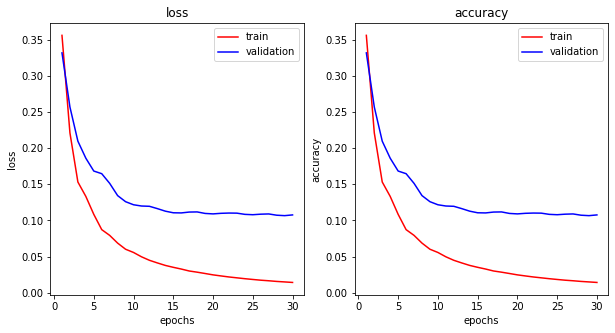

In [ ]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
acc = his_dict['mse']
val_acc = his_dict['val_mse']
epochs = range(1,31 ) #1~20 epoch

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

### index별 doc 생성


In [ ]:
#index 별 doc 생성 
doc_index_text_df = pd.DataFrame({'index' : rating_text_df.index, 'Token_review_text' : rating_text_df['Token_review_text']}).values.tolist()
len(doc_index_text_df)

NameError: ignored

In [ ]:
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_index_text_df]  #gensim의 doc2vec에서 필요한 기능

In [ ]:
max_epochs = 10

model = Doc2Vec(
    window=10,
    size=100,
    alpha=0.025, 
    min_alpha=0.025,
    min_count=2,
    dm =1,  #pv-dm: 1, pv-dbow:2
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)#10분만에 수행완료    #10분만에 수행완료    

for epoch in range(max_epochs):#40분 걸림
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha


#model.save('index_review_text_model.doc2vec')# 모델 저장함 
model_index = Doc2Vec.load('index_review_text_model.doc2vec')#모델 불러올 때 사용